In [1]:
!pip install librosa
!apt-get update
# something else to fix error when importing librosa may need to go here

    100% |████████████████████████████████| 1.6MB 2.8MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/79/75/e22272b9c2185fc8f3af6ce37229708b45e8b855fd4bc38b4d6b040fff65/resampy-0.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/0e/6e/e3bd3b844ee2dd815c313807a6030706845ffa6387e95d20e2eb79370036/numba-0.46.0-cp37-cp37m-macosx_10_9_x86_64.whl
    100% |████████████████████████████████| 614kB 4.4MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ca/ba/1b1e5c4c707c082b1125c30f93887b827ee3db6a2e86184532fe529d31bd/llvmlite-0.30.0-cp37-cp37m-macosx_10_9_x86_64.whl
    100% |████████████████████████████████| 266kB 1.6MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/68/9e/49196946aee219aead1290e00d1e7fdeab8567783e83e1b9ab5585e6206a/pycparser-2.19.tar.gz
  Stored in directory: /Users/kalyan/Library/Caches/pip/wheels/07/36/47/a9a4d151332cbdaec564500af9704a0ad862cf554dcf4bfda0
  Stored in directory: /Users/kalyan/Libr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

path = Path.cwd(); print(path)

/Users/kalyan/Documents/learning/machine learning/music-genre-classification


## Downloading and Extracting Data

In [3]:
import requests
import sys

import tarfile

In [20]:
def download(url, filename):
    with open(filename, 'wb') as f:
        response = requests.get(url, stream=True)
        total = response.headers.get('content-length')
        
        print(f"Downloading file of size {round(total/1e6, 1)} MB")
        if total is None:
            f.write(response.content)
        else:
            downloaded = 0
            total = int(total)
            for data in response.iter_content(chunk_size=max(int(total/1000), 1024*1024)):
                downloaded += len(data)
                f.write(data)
                done = int(50*downloaded/total)
                sys.stdout.write('\r[{}{}]'.format('█' * done, '.' * (50-done)))
                sys.stdout.flush()
    sys.stdout.write('\n')

url = 'http://opihi.cs.uvic.ca/sound/genres.tar.gz'
target_path = path/"genres.tar.gz"
download(url, target_path)

[██████████████████████████████████████████████████]


In [28]:
def extract_t_gz(path_in, path_out):
    if (path_in.endswith("tar.gz")):
        tar = tarfile.open(path_in, "r:gz")
        tar.extractall(path=path_out)
        tar.close()
    elif (path_in.endswith("tar")):
        tar = tarfile.open(path_in, "r:")
        tar.extractall(path=path_out)
        tar.close()

extract_t_gz(str(target_path), str(path/'data'))

## Exploring Data

In [4]:
import librosa
import IPython.display

In [5]:
# data folders
data_folder = path/'data'/'genres'

genre_folders = [file for file in data_folder.iterdir() if file.is_dir()]; genre_folders

[PosixPath('/Users/kalyan/Documents/learning/machine learning/music-genre-classification/data/genres/pop'),
 PosixPath('/Users/kalyan/Documents/learning/machine learning/music-genre-classification/data/genres/metal'),
 PosixPath('/Users/kalyan/Documents/learning/machine learning/music-genre-classification/data/genres/disco'),
 PosixPath('/Users/kalyan/Documents/learning/machine learning/music-genre-classification/data/genres/blues'),
 PosixPath('/Users/kalyan/Documents/learning/machine learning/music-genre-classification/data/genres/reggae'),
 PosixPath('/Users/kalyan/Documents/learning/machine learning/music-genre-classification/data/genres/classical'),
 PosixPath('/Users/kalyan/Documents/learning/machine learning/music-genre-classification/data/genres/rock'),
 PosixPath('/Users/kalyan/Documents/learning/machine learning/music-genre-classification/data/genres/hiphop'),
 PosixPath('/Users/kalyan/Documents/learning/machine learning/music-genre-classification/data/genres/country'),
 Posi

In [7]:
import librosa
import librosa.display

def read_audio(pathname):
    y, sr = librosa.load(pathname, sr=44100)
    return y

def audio_to_melspectrogram(audio):
    spectrogram = librosa.feature.melspectrogram(audio, 
                                                 sr=44100,
                                                 #n_mels=conf.n_mels,
                                                 #hop_length=conf.hop_length,
                                                 #n_fft=conf.n_fft,
                                                 #fmin=conf.fmin,
                                                 #fmax=conf.fmax
                                                )
    spectrogram = librosa.power_to_db(spectrogram)
    spectrogram = spectrogram.astype(np.float32)
    return spectrogram

def show_melspectrogram(mels, title='Log-frequency power spectrogram'):
    librosa.display.specshow(mels, x_axis='time', y_axis='mel', 
                             sr='44100'#, hop_length=conf.hop_length,
                            #fmin=conf.fmin, fmax=conf.fmax
                            )
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

def read_as_melspectrogram(pathname, debug_display=False):
    x = read_audio(pathname)
    mels = audio_to_melspectrogram(x)
    if debug_display:
        IPython.display.display(IPython.display.Audio(x, rate=44100))
        show_melspectrogram(mels)
    return mels



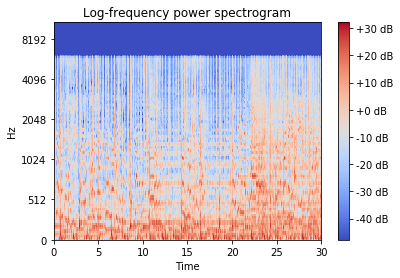

In [9]:
reggae_files = [file for file in genre_folders[0].iterdir()]
spec = read_as_melspectrogram(reggae_files[0], debug_display=True)

In [ ]:
# make dataframe of audio file paths for easy reloading
df = pd.DataFrame()

for folder in genre_folders:
    genre_name = folder.name
    wav_files = [file for file in folder.glob('*.wav')]
    
    for file in wav_files:
        df = df.append(pd.Series({'genre': genre_name, 'filename': file.name, 'path': file}), ignore_index=True)
        
df.sample(3)

df.to_csv(path/'data'/'wav_files.csv')